In [2]:
import numpy as np 
import gymnasium as gym
import time 

class SARSA:
    def __init__ (self,env,alpha,gamma,epsilon,episodes):
        self.env=env
        self.alpha=alpha
        self.gamma=gamma
        self.epsilon=epsilon
        self.episodes=episodes

        self.n_states=env.observation_space.n
        self.n_actions=env.action_space.n

        self.q=np.zeros((self.n_states,self.n_actions))
    def select_action(self,state):
        if np.random.rand()<self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            max_q=np.max(self.q[state])
            action=np.where(self.q[state]==max_q)[0]
            return np.random.choice(action)
    def train(self):
        for i in range(self.episodes):
            state,_=self.env.reset() 
            action=self.select_action(state)
            done=False
            while not done: 
                next_state,reward,terminated,truncated,_=self.env.step(action)
                next_action=self.select_action(next_state)
                done=terminated or truncated
                if not done: 
                    reward=-0.1
                if not done:
                    target=reward+self.gamma*self.q[next_state,next_action]
                else:
                    target=reward
                self.q[state,action]+=self.alpha*(target-self.q[state,action])
                action=next_action
                state=next_state
            self.epsilon=max(0.01,self.epsilon*0.9995)
    def policy(self):
        policy=np.zeros(self.n_states,dtype=int)
        for i in range(self.n_states):
            action=np.where(self.q[i]==np.max(self.q[i]))[0]
            policy[i]=np.random.choice(action)
        return policy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


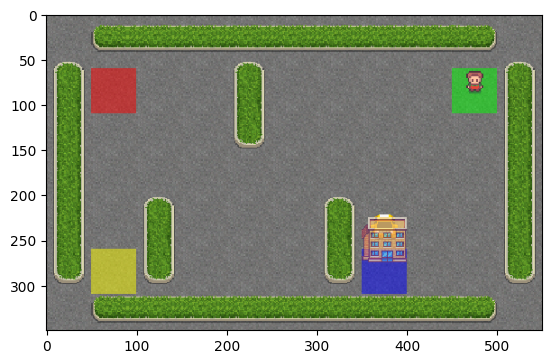

In [3]:
import matplotlib.pyplot as plt
env = gym.make('Taxi-v3', render_mode='rgb_array')
env.reset()
plt.imshow(env.render())
plt.show() 

In [4]:
agent=SARSA(env=env,alpha=0.1,gamma=0.99,epsilon=1.0,episodes=5000)
agent.train()
policy=agent.policy()

1st episode example


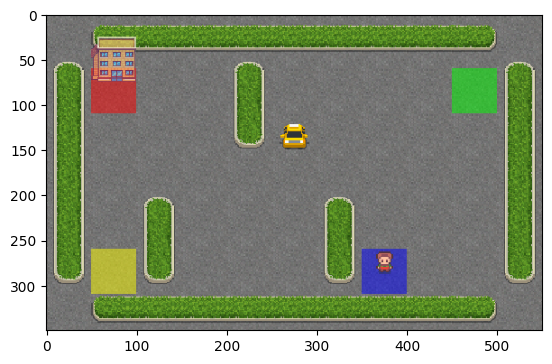

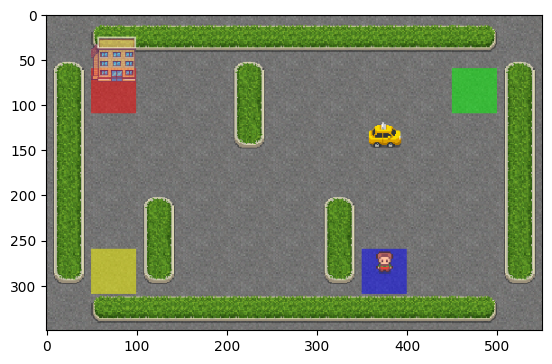

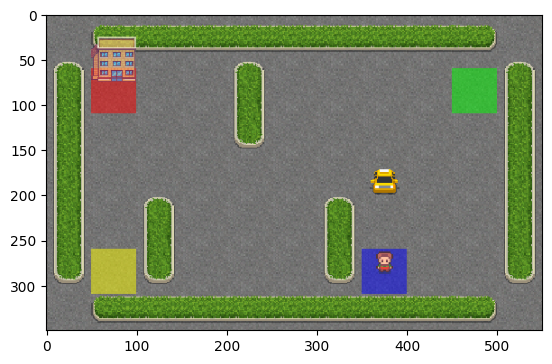

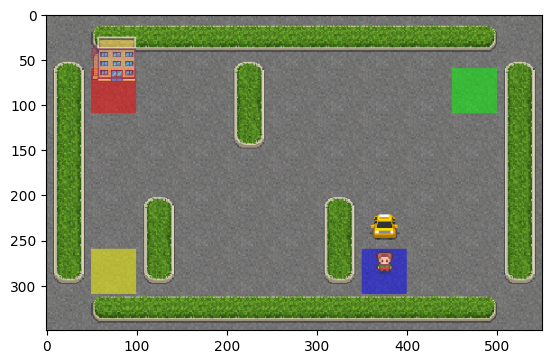

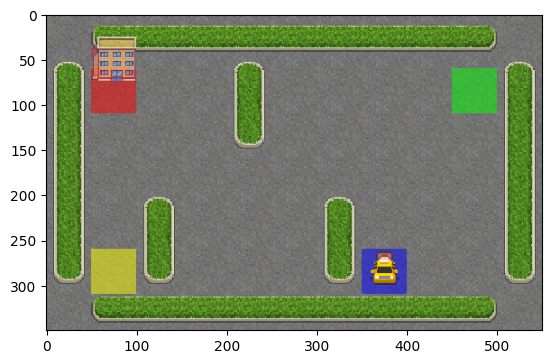

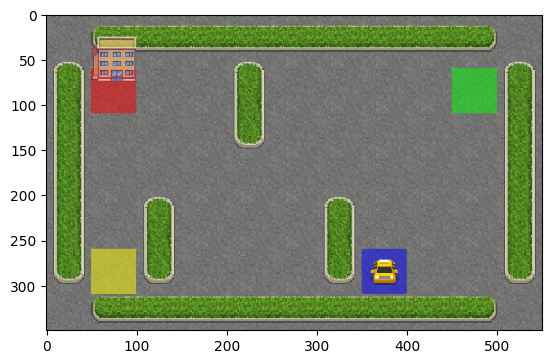

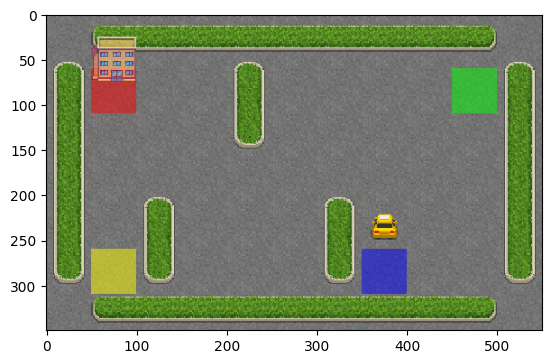

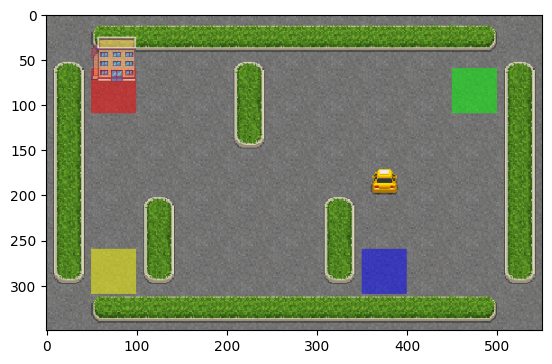

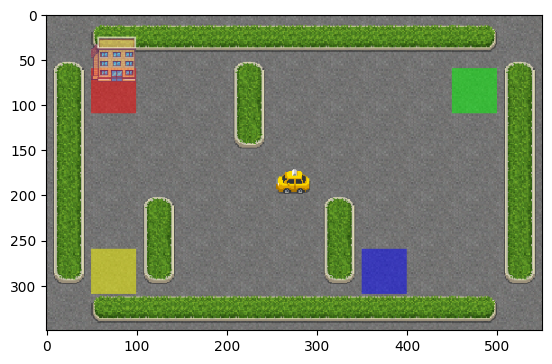

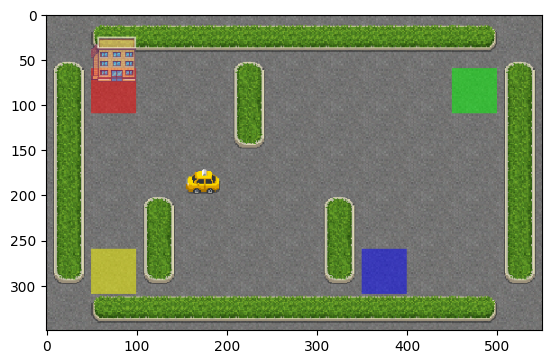

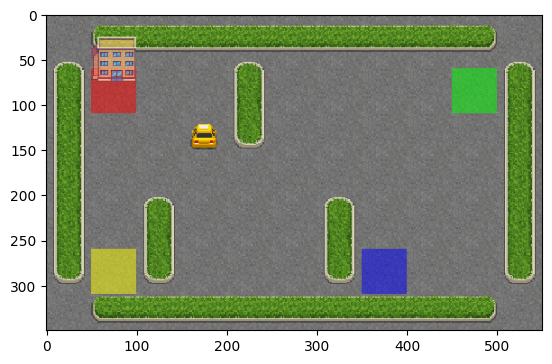

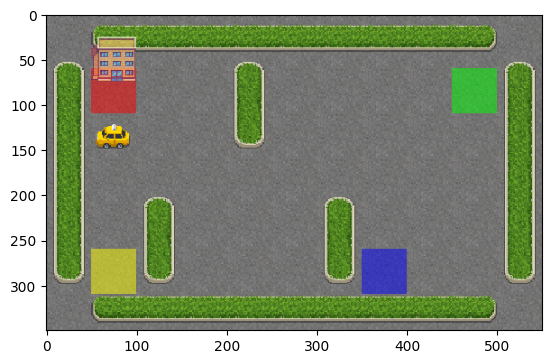

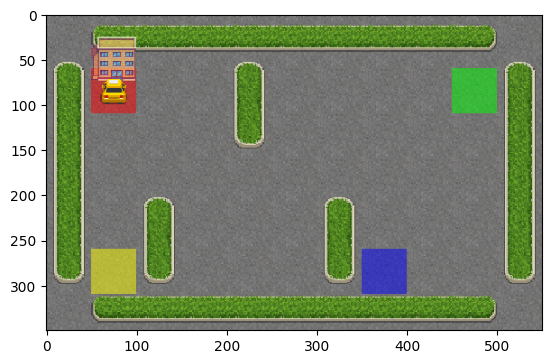

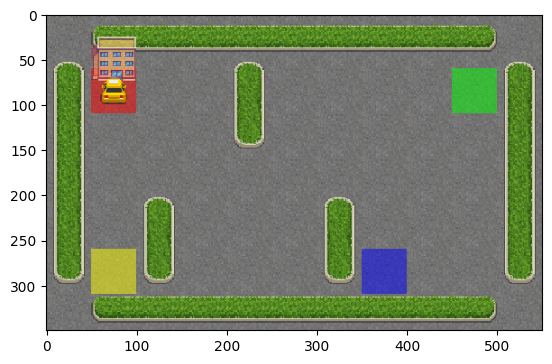

In [5]:
env_v=gym.make('Taxi-v3',render_mode='rgb_array')


print('1st episode example')

try:
    for i in range(1):
        state,_=env_v.reset()
        for j in range(50):
            plt.imshow(env_v.render())
            plt.show()
            state,reward,terminated,truncated,_=env_v.step(policy[state])
            if terminated or truncated:
                plt.imshow(env_v.render())
                plt.show()
                break
finally:
    env_v.close() 

In [8]:
env_1=gym.make('Taxi-v3',render_mode='human')

try:
    for i in range(5):
        state,_=env_1.reset()
        for j in range(50):
            time.sleep(0.4)
            state,reward,terminated,truncated,_=env_1.step(policy[state])
            if terminated or truncated:
                time.sleep(1)
                break
finally:
    env_v.close() 